# Importation des librairies necessaires au travail

In [3]:
import sys,os
sys.path.append(os.getcwd())
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from numpy import random
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

In [4]:
# Pour RNC
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

# Lecture des fichiers de données à classifier
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [5]:
# données
X = np.genfromtxt('data.csv', delimiter=',', dtype=int)
X.shape

(5000, 400)

# Y avant transformation

In [6]:
# étiquettes
Y = np.genfromtxt('labels.csv', delimiter=',', dtype=int)
Y.shape

(5000,)

# On veut utiliser OvR pour calculer la courbe ROC.
# OvR signifie "One vs Rest", et comme son nom l'indique est une méthode pour évaluer les modèles multiclasses en comparant chaque classe aux autres instantanément. Dans ce scénario, nous prenons une classe et la considérons comme notre classe "positive", tandis que toutes les autres (le reste) sont considérées comme la classe "négative".
# En Y créer un attribut binaire par étiquète (0,1,..,9), pour instance : un attribut égal à 1 lorsque l'étiquète est "1" (et 0 sinon), un autre attribut égal à 1 lorsque la etiquete est « 2 » (et 0 sinon), et ainsi de suite. 

In [7]:
from sklearn.preprocessing import label_binarize
labels=np.unique(Y)
classes=np.unique(Y)
Y = label_binarize(Y, classes=classes)

# Y après transformation

In [8]:
Y.shape

(5000, 10)

In [9]:
Y[3000,:]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [7]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve,auc,precision_score

In [10]:
from sklearn import svm

# Courbe de ROC pour MVS



In [13]:
#create a MvS
rf = OneVsRestClassifier(svm.SVC(kernel='linear'))

Xt, Xtt, Yt, Ytt = train_test_split(X, Y, random_state=0, test_size=0.3)

rf.fit(Xt, Yt)
pred = rf.predict(Xtt)
pred_prob = rf.decision_function(Xtt)

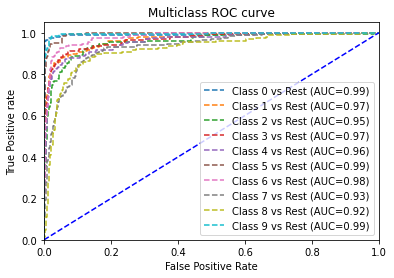

In [14]:
# roc curve for classes
fpr = {}
tpr = {}
roc_auc = dict()

n_class = Ytt.shape[1]

for i in range(n_class):    
    fpr[i], tpr[i], _ = roc_curve(Ytt[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='Class %d vs Rest (AUC=%0.2f)'%(i,roc_auc[i]))


plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()